In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functions.ticks import CapitalStock
from functions.my_functions import *

## S32

In [2]:
s32 = CapitalStock('S32.AX', 'South32')

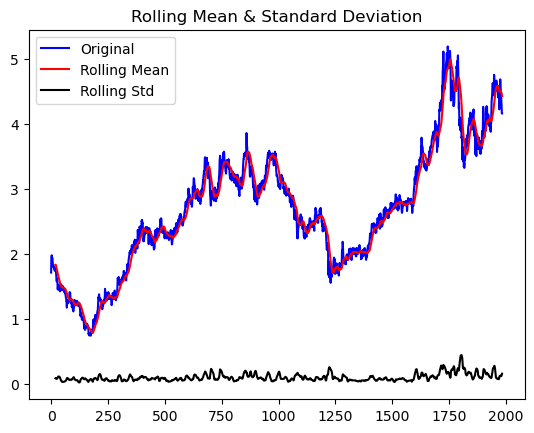

Results of Dickey-Fuller Test:
------------------------------------------
Test Statistic                   -1.311818
p-value                           0.623748
#Lags Used                        0.000000
Number of Observations Used    1983.000000
Critical Value (1%)              -3.433652
Critical Value (5%)              -2.862999
Critical Value (10%)             -2.567547
dtype: float64
------------------------------------------
Result: Not Stationary
------------------------------------------


In [3]:
s32.Stationarity()

In [9]:
data = s32.HistoricalData.adjclose.apply(np.sqrt)
data

symbol  date      
S32.AX  2015-05-18    1.308144
        2015-05-19    1.394622
        2015-05-20    1.403572
        2015-05-21    1.406542
        2015-05-22    1.388624
                        ...   
        2023-03-09    2.116601
        2023-03-10    2.080865
        2023-03-13    2.071232
        2023-03-14    2.039608
        2023-03-15    2.039608
Name: adjclose, Length: 1984, dtype: float64

In [11]:
data = s32.HistoricalData

In [86]:
data = DFprocess(s32.HistoricalData, date_feat=False, drop_cols=['low', 'high'])

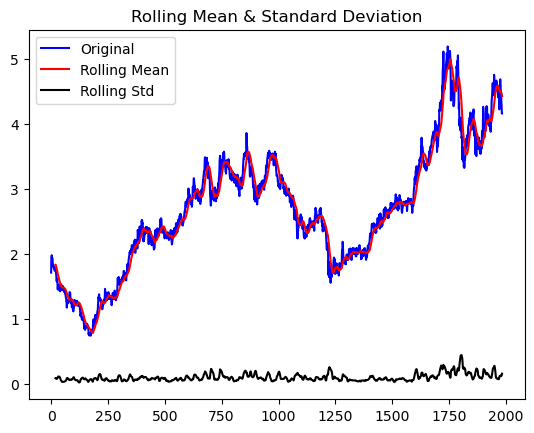

Results of Dickey-Fuller Test:
------------------------------------------
Test Statistic                   -1.311818
p-value                           0.623748
#Lags Used                        0.000000
Number of Observations Used    1983.000000
Critical Value (1%)              -3.433652
Critical Value (5%)              -2.862999
Critical Value (10%)             -2.567547
dtype: float64
------------------------------------------
Result: Not Stationary
------------------------------------------


In [87]:
test_stationarity(data.adjclose)

In [88]:
DAYS = 50
n_features = 1

def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

In [119]:
def data_split(X, y, portion):
    """
    Accepts both a percentage of data argument (iff portion < 2) or a cardinal value (iff integer).
    Returns X_train, y_train, X_test, y_test.
    """
    if portion < 1:
        split = int(len(y)*portion)
    elif type(portion) == int:
        split = portion
        
    X_train, y_train = X[:-split], y[:-split]
    X_test, y_test = X[-split:], y[-split:]

    return X_train, y_train, X_test, y_test
    

In [120]:
X_train, y_train, X_test, y_test = data_split(X, y, 0.1)

In [124]:
def plot_split(data, portion):
    
    if portion < 1:
        split = int(len(data)*portion)
    elif type(portion) == int:
        split = portion
    
    train_original = data.iloc[:-split]
    test_original = data.iloc[-split:]

    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(train_original.date, train_original.adjclose, 'b', label='Train data')
    plt.plot(test_original.date, test_original.adjclose, 'r', label='Test data')
    plt.legend()
    return plt.show()

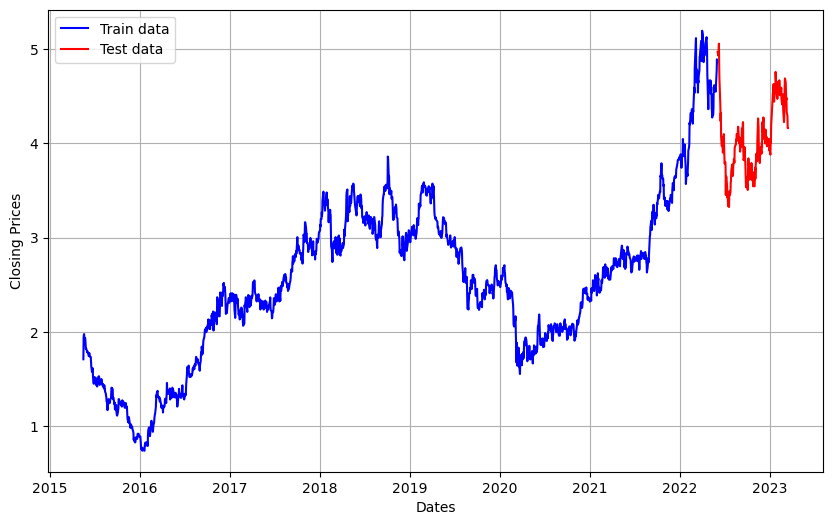

In [125]:
plot_split(data, 0.1)

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [148]:
class lstm:
    
    def __init__(self, units, days, n_features, n_dense_layer):
        model = Sequential()
        model.add(LSTM(units=units, input_shape=(days, n_features)))
        model.add(Dense(n_dense_layer))

In [150]:
a_model = lstm(100, 50, 1, 2)

In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [137]:
def create_model(summary=False):
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(DAYS, n_features)))
    model.add(Dense(1))
    
    if summary==True:
        model.summary()
        
    return model

In [138]:
thing = create_model

In [142]:
model.compile(optimizer='adam', loss='MeanAbsolutePercentageError', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [140]:
model = Sequential()
model.add(LSTM(units=100, input_shape=(DAYS, n_features)))
model.add(Dense(1))

In [143]:
model.fit(X_train, y_train, epochs=15, batch_size = 32)

Epoch 1/15
55/55 [==============================] - 6s 37ms/step - loss: 17.4234 - mean_absolute_error: 0.4508
Epoch 2/15
55/55 [==============================] - 2s 34ms/step - loss: 3.6488 - mean_absolute_error: 0.0926
Epoch 3/15
55/55 [==============================] - 2s 33ms/step - loss: 3.4424 - mean_absolute_error: 0.0854
Epoch 4/15
55/55 [==============================] - 2s 34ms/step - loss: 3.1324 - mean_absolute_error: 0.0768
Epoch 5/15
55/55 [==============================] - 2s 35ms/step - loss: 3.1343 - mean_absolute_error: 0.0768
Epoch 6/15
55/55 [==============================] - 2s 35ms/step - loss: 3.0431 - mean_absolute_error: 0.0742
Epoch 7/15
55/55 [==============================] - 2s 36ms/step - loss: 3.0413 - mean_absolute_error: 0.0746
Epoch 8/15
55/55 [==============================] - 2s 35ms/step - loss: 2.7736 - mean_absolute_error: 0.0676
Epoch 9/15
55/55 [==============================] - 2s 36ms/step - loss: 2.6479 - mean_absolute_error: 0.0639
Epoch 10/

In [147]:
# Prediction
split = int(len(data)*0.1)

y_pred = model.predict(X_test)

# We create a dataframe from y_pred to have date-time indexes.
pred_data = pd.DataFrame(y_pred[:,0], data.iloc[-split:].index,columns=['Close'])

# Apply inverse transformation from 1.d

# Add the differenciation term
#pred_data['Close'] = pred_data['Close'] + df_close_tf.shift().values[-2*day_split:] 

# Add trend back in
#pred_data['price'] = pred_data['Close'].add(1,fill_value=0).cumprod() * train_original.adjclose.iloc[-1]
pred_data['price'] = pred_data['Close'].apply(np.exp)

# Plot actual prices vs predicted prices 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data['adjclose'].iloc[:-split],'b',label='Actual prices')
plt.plot(data['price'].iloc[-split:], 'orange',label='Predicted prices')
plt.title('South32' + ' Stock Price')

plt.legend()

7/7 [==============================] - 0s 11ms/step


ValueError: Shape of passed values is (193, 1), indices imply (198, 1)

## BHP

In [2]:
bhp = CapitalStock('BHP.AX', 'BHP Billiton')

In [4]:
prediction = bhp.CreateModel(10, 50, 1, 1, 0.1)

Epoch 1/15
80/80 [==============================] - 3s 14ms/step - loss: 91.8229 - mean_absolute_error: 9.0282
Epoch 2/15
80/80 [==============================] - 1s 14ms/step - loss: 63.9106 - mean_absolute_error: 8.0070
Epoch 3/15
80/80 [==============================] - 1s 15ms/step - loss: 44.6984 - mean_absolute_error: 6.8891
Epoch 4/15
80/80 [==============================] - 1s 14ms/step - loss: 38.2054 - mean_absolute_error: 6.2557
Epoch 5/15
80/80 [==============================] - 1s 15ms/step - loss: 34.7290 - mean_absolute_error: 5.8228
Epoch 6/15
80/80 [==============================] - 1s 15ms/step - loss: 32.3399 - mean_absolute_error: 5.4853
Epoch 7/15
80/80 [==============================] - 1s 15ms/step - loss: 30.8979 - mean_absolute_error: 5.2847
Epoch 8/15
80/80 [==============================] - 1s 15ms/step - loss: 29.6349 - mean_absolute_error: 5.1010
Epoch 9/15
80/80 [==============================] - 1s 15ms/step - loss: 28.4406 - mean_absolute_error: 4.9256
E

In [5]:
prediction

array([[8.572062],
       [8.571991],
       [8.572032],
       [8.572083],
       ...,
       [7.795888],
       [7.796535],
       [7.795701],
       [7.795614]], dtype=float32)

In [23]:

#pred_data = pd.DataFrame(prediction[:,0], np.array(bhp.Preprocess(50,1,0.1)[5]))
pred_data = pd.DataFrame(prediction[:,0],bhp.Preprocess(50,1,0.1)[5].index,columns=['adjclose'])

DFprocess(pred_data).date

0     2019-09-17
1     2019-09-18
2     2019-09-19
3     2019-09-20
4     2019-09-23
         ...    
880   2023-03-09
881   2023-03-10
882   2023-03-13
883   2023-03-14
884   2023-03-15
Name: date, Length: 885, dtype: datetime64[ns]

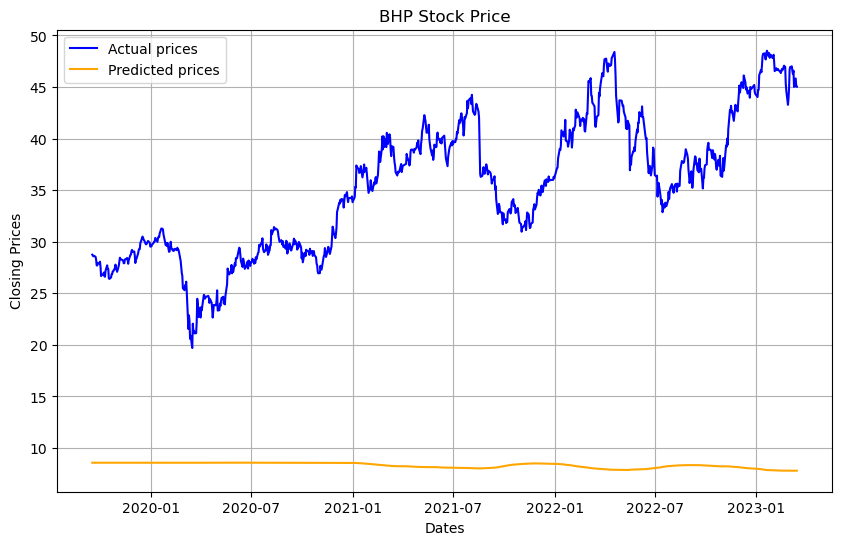

In [24]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(DFprocess(pred_data).date, np.array(bhp.Preprocess(50,1,0.1)[5]),'b',label='Actual prices')
plt.plot(DFprocess(pred_data).date, np.array(pred_data), 'orange',label='Predicted prices')
plt.title('BHP' + ' Stock Price')
plt.legend()
plt.show()

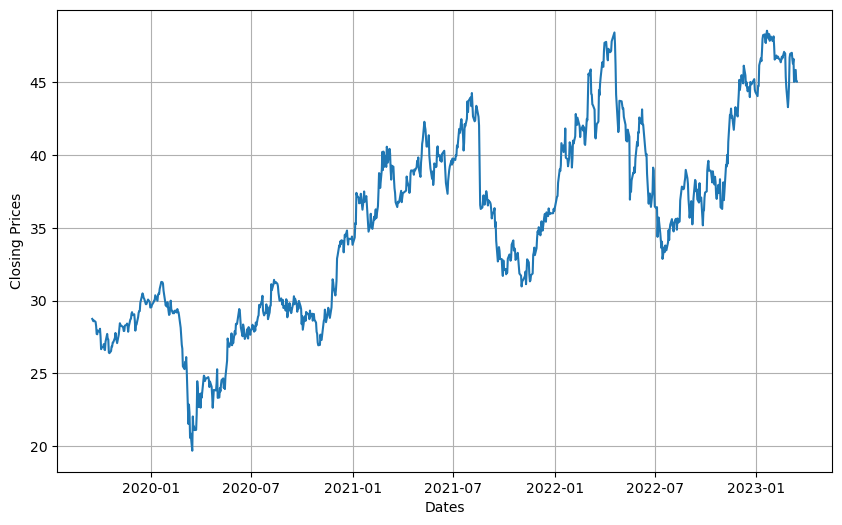

In [30]:
df = DFprocess(bhp.HistoricalData.adjclose)
df = df.loc[df.date > '2019-09-16']

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df.date, df.adjclose)
plt.show()

In [8]:
# We create a dataframe from y_pred to have date-time indexes.
pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['adjclose'])

print(pred_data)

# Apply inverse transformation from 1.d

# Add trend back in
#pred_data['price'] = pred_data['Close'].apply(np.exp)

# Plot actual prices vs predicted prices 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(np.array(test_original),'b',label='Actual prices')
plt.plot(np.array(pred_data), 'orange',label='Predicted prices')
plt.title(self.company + ' Stock Price')
plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

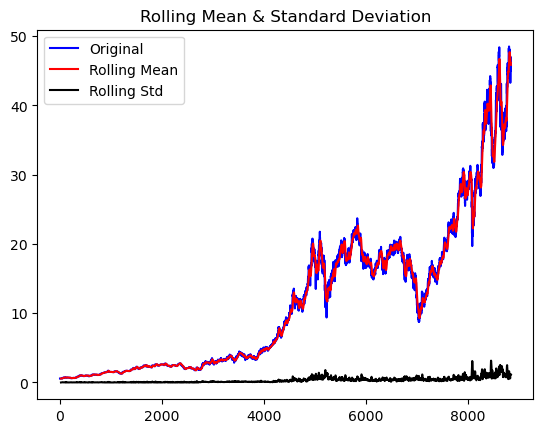

Results of Dickey-Fuller Test:
------------------------------------------
Test Statistic                    0.598139
p-value                           0.987570
#Lags Used                       28.000000
Number of Observations Used    8821.000000
Critical Value (1%)              -3.431092
Critical Value (5%)              -2.861868
Critical Value (10%)             -2.566944
dtype: float64
------------------------------------------
Result: Not Stationary
------------------------------------------


In [32]:
bhp.Stationarity()

In [11]:
import tensorflow as tf

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [9]:
class lstm:
    def __init__(self, timeseries):
        self.timeseries = timeseries.dropna()
        
    def Stationarity(self):
        return test_stationarity(self.timeseries)
    
    def MakeStationary(self):
        method = {}
        series = self.timeseries.dropna()        
        if test_stationarity(series) == True:
            method['nothing'] = True
            return series, method
        elif test_stationarity(series.apply(np.log)) == True:
            method['log'] = True
            return series.apply(np.log), method
        elif test_stationarity(series.apply(np.sqrt)) == True:
            method['sqrt'] = True
            return series.apply(np.sqrt), method
        elif test_stationarity(series.apply(np.sqrt).apply(np.log)) == True:
            method['sqrt-log'] = True
            return series.apply(np.log).apply(np.sqrt), method
        elif test_stationarity(series.diff().dropna()) == True:
            method['diff'] = True
            return series.diff().dropna(), method
        else:
            print("Could not make time series stationary, manual intervention required for continuation.")

    def preprocess_lstm(self, n_steps,n_features):
        X, y = list(), list()
        for i in range(len(self.timeseries)):
            # find the end of this pattern
            end_ix = i + n_steps
            # check if we are beyond the sequence
            if end_ix >= len(self.timeseries):
                break
            # gather input and output parts of the pattern
            seq_x, seq_y = self.timeseries[i:end_ix], self.timeseries[end_ix]
            X.append(seq_x)
            y.append(seq_y)

        X = np.array(X)
        y = np.array(y)

        X = X.reshape((X.shape[0], X.shape[1], n_features))
        return X, y
            
    def Preprocess(self, n_steps, n_features, portion):
        """
        n_steps: number of points in time series for each batch. n_feature: number of features considered. 
        Accepts both a percentage of data argument (iff portion < 2) or a cardinal value (iff integer).
        Returns X_train, y_train, X_test, y_test.
        """ 
        if portion < 1:
            split = int(len(self.timeseries)*portion)
        elif type(portion) == int:
            split = portion

        train_original = self.timeseries.iloc[:-split]
        test_original = self.timeseries.iloc[-split:]
            
        X, y = preprocess_lstm(self.timeseries, n_steps, n_features)

        X_train, y_train = X[:-split], y[:-split]
        X_test, y_test = X[-split:], y[-split:]

        return X_train, y_train, X_test, y_test, train_original, test_original
    
    def CreateModel(self, n_units, n_steps, n_features, n_dense, portion):
        model = Sequential()
        model.add(LSTM(units=n_units, input_shape=(n_steps, n_features)))
        model.add(Dense(n_dense))
        
        model.compile(optimizer='adam', loss='MeanAbsolutePercentageError', metrics=[tf.keras.metrics.MeanAbsoluteError()])
        
        X_train, y_train, X_test, y_test, train_original, test_original = self.Preprocess(n_steps, n_features, portion)
        
        model.fit(X_train, y_train, epochs=15, batch_size = 100)
        
        print("Evaluate on test data")
        results = model.evaluate(X_test, y_test, batch_size=100)
        print("Test MSE:", results[0])
        print("Test MAE:", results[1])
        
        
        y_pred = model.predict(X_test)

        return y_pred, test_original

In [146]:
X_train, y_train, X_test, y_test, train_original, test_original = bhp.Preprocess(50, 1, 20)

In [145]:
bhp_lstm = lstm(bhp.HistoricalData.adjclose.apply(np.sqrt).apply(np.log).dropna()[5000:])
my_pred = bhp_lstm.CreateModel(100, 50, 1, 1, 20)

Epoch 1/15
38/38 [==============================] - 4s 48ms/step - loss: 19.5298 - mean_absolute_error: 0.2946
Epoch 2/15
38/38 [==============================] - 2s 47ms/step - loss: 2.5752 - mean_absolute_error: 0.0404
Epoch 3/15
38/38 [==============================] - 2s 47ms/step - loss: 1.3772 - mean_absolute_error: 0.0208
Epoch 4/15
38/38 [==============================] - 2s 49ms/step - loss: 1.4346 - mean_absolute_error: 0.0214
Epoch 5/15
38/38 [==============================] - 2s 47ms/step - loss: 1.1493 - mean_absolute_error: 0.0170
Epoch 6/15
38/38 [==============================] - 2s 48ms/step - loss: 1.0553 - mean_absolute_error: 0.0156
Epoch 7/15
38/38 [==============================] - 2s 49ms/step - loss: 1.0384 - mean_absolute_error: 0.0154
Epoch 8/15
38/38 [==============================] - 2s 45ms/step - loss: 1.0761 - mean_absolute_error: 0.0159
Epoch 9/15
38/38 [==============================] - 2s 44ms/step - loss: 1.0636 - mean_absolute_error: 0.0157
Epoch 10/

In [147]:
#my_list = my_pred[:,0].tolist()
#my_list.insert(0, test_original[0])
my_list = pd.Series(my_pred[:,0]).apply(np.square).apply(np.exp)


df = pd.DataFrame(np.array(my_list), test_original.index, columns=['pred'])
df['original'] = np.array(test_original)

In [148]:
df2 = DFprocess(df)
df2['diff'] = df2['original'] - df2['pred']
df2

,symbol,date,pred,original,diff
0,BHP.AX,2023-02-17,39.202080,46.625771,7.423691
1,BHP.AX,2023-02-20,39.191399,47.072601,7.881203
2,BHP.AX,2023-02-21,39.272568,46.917179,7.644611
3,BHP.AX,2023-02-22,39.372215,46.956036,7.583820
4,BHP.AX,2023-02-23,39.479443,45.353275,5.873833
5,BHP.AX,2023-02-24,39.309982,44.624748,5.314766
6,BHP.AX,2023-02-27,38.882439,43.274544,4.392105
7,BHP.AX,2023-02-28,38.128887,43.905933,5.777046
8,BHP.AX,2023-03-01,37.390739,44.896732,7.505993
9,BHP.AX,2023-03-02,36.898769,46.674339,9.775570


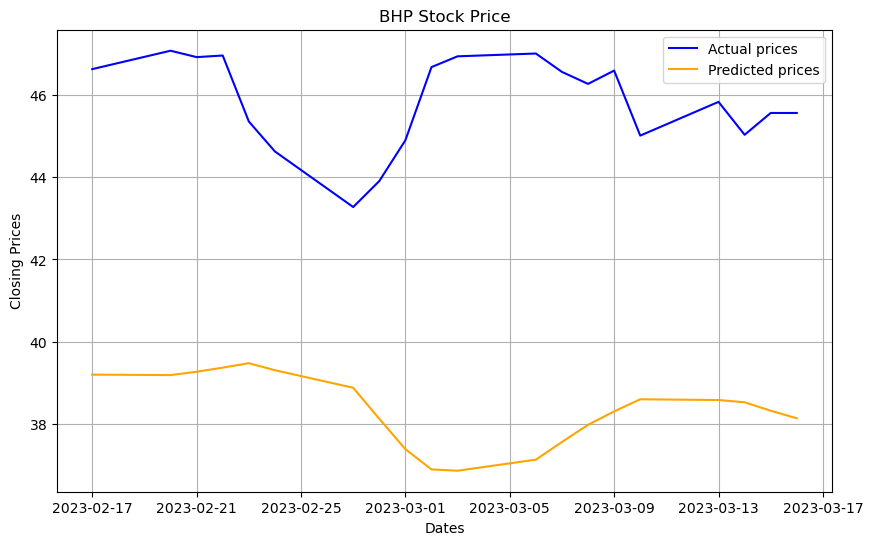

In [149]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df2.date, df2.original,'b',label='Actual prices')
plt.plot(df2.date, df2.pred, 'orange',label='Predicted prices')
plt.title('BHP' + ' Stock Price')
plt.legend()
plt.show()

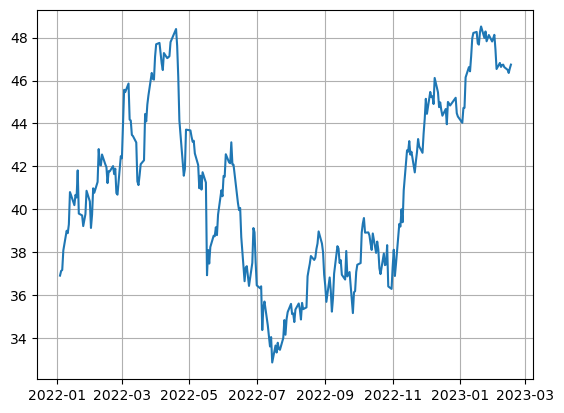

In [150]:
df3 = DFprocess(train_original)
df4 = df3.loc[df3.date > '2021-12-31']

plt.grid(True)
plt.plot(df4.date, df4.adjclose)

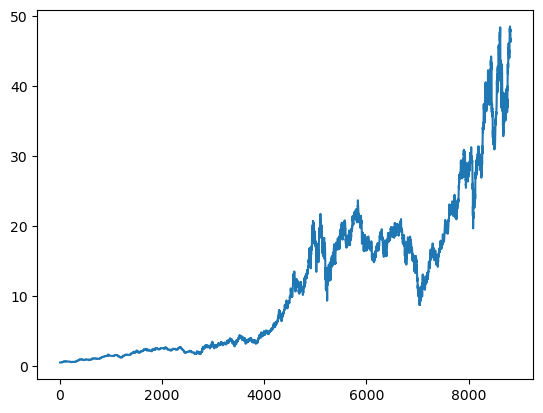

In [144]:
plt.plot(np.array(train_original))

In [ ]:
        
# We create a dataframe from y_pred to have date-time indexes.
pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['adjclose'])

print(pred_data)

# Apply inverse transformation from 1.d

# Add trend back in
#pred_data['price'] = pred_data['Close'].apply(np.exp)

# Plot actual prices vs predicted prices 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(np.array(test_original),'b',label='Actual prices')
plt.plot(np.array(pred_data), 'orange',label='Predicted prices')
plt.title(self.company + ' Stock Price')
plt.legend()
plt.show()


In [68]:
my_list = my_pred[:,0].tolist()
my_list.insert(0, test_original[0])

In [71]:
np.array(my_list).cumsum()

array([28.668047, 28.668491, 28.668913, 28.669415, ..., 29.011684, 29.012833, 29.012405, 29.013256])

In [ ]:
test_original[0], 1, test_original[0] + my_pred[:,0].cumsum())

In [46]:
hs = np.array([2,3,4,5,6])

In [47]:
np.insert(1,1,hs)

array([1, 2, 3, 4, 5, 6])

In [55]:
ip = np.array([1, 1.1, 2.01, 0.001, 0.00001, 0.00001])

In [56]:
np.insert(1,1, ip)

array([1, 1, 1, 2, 0, 0, 0])

In [120]:
hs

array([2, 3, 4, 5, 6])

In [126]:
pd.Series(range(0,100)).apply(np.sqrt).apply(np.log).apply(np.exp).apply(np.square)

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
95    95.0
96    96.0
97    97.0
98    98.0
99    99.0
Length: 100, dtype: float64